資料預處理

In [176]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import graphviz
import time
df=pd.read_csv("adult.data",names=["age","workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]) 
#刪除重複和問號的值
print("原始比數：",df.shape)
df.drop_duplicates(inplace=True)
print("刪除重複的值後：",df.shape)
df = df.replace(" ?", np.nan)
print("空的值有幾筆",df[pd.isnull(df).any(axis=1)].shape)
df.dropna(inplace=True)
print("刪除空值：",df.shape)

原始比數： (32561, 15)
刪除重複的值後： (32537, 15)
空的值有幾筆 (2398, 15)
刪除空值： (30139, 15)


In [177]:
df_y=df['hours-per-week']
df_X=df.drop(['hours-per-week'],axis=1)

normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','education-num']
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']
#y_columns=['hours-per-week']
#將類別資料轉成 labelencode
le = LabelEncoder()
for col in categorical_columns:
    df_X[col] = le.fit_transform(df_X[col])

def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df_X[columns] = scaler.fit_transform(df_X[columns])

normalize(normalize_columns)


print(df_X)

            age  workclass    fnlwgt  education  education-num  \
0      0.042516          5 -1.062676          9       1.128996   
1      0.880215          4 -1.007829          9       1.128996   
2     -0.033639          2  0.244669         11      -0.440434   
3      1.108678          2  0.425206          1      -1.225149   
4     -0.795183          2  1.406572          9       1.128996   
...         ...        ...       ...        ...            ...   
32556 -0.871338          2  0.638926          7       0.736639   
32557  0.118670          2 -0.335246         11      -0.440434   
32558  1.489450          2 -0.358567         11      -0.440434   
32559 -1.252110          2  0.110688         11      -0.440434   
32560  1.032523          3  0.928780         11      -0.440434   

       marital-status  occupation  relationship  race  sex  capital-gain  \
0                   4           0             1     4    1      0.145925   
1                   2           3             0     4  

In [178]:
df['salary']
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
onehot = onehotencoder.fit_transform(df[['salary']]).toarray()
pd.DataFrame(onehot)

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
30134,1.0,0.0
30135,0.0,1.0
30136,1.0,0.0
30137,1.0,0.0


In [179]:
df_X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,salary
0,0.042516,5,-1.062676,9,1.128996,4,0,1,4,1,0.145925,-0.218673,38,0
1,0.880215,4,-1.007829,9,1.128996,2,3,0,4,1,-0.147502,-0.218673,38,0
2,-0.033639,2,0.244669,11,-0.440434,0,5,1,4,1,-0.147502,-0.218673,38,0
3,1.108678,2,0.425206,1,-1.225149,2,5,0,2,1,-0.147502,-0.218673,38,0
4,-0.795183,2,1.406572,9,1.128996,2,9,5,2,0,-0.147502,-0.218673,4,0


In [180]:
df_X.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,salary
32556,-0.871338,2,0.638926,7,0.736639,2,12,5,4,0,-0.147502,-0.218673,38,0
32557,0.118670,2,-0.335246,11,-0.440434,2,6,0,4,1,-0.147502,-0.218673,38,1
32558,1.489450,2,-0.358567,11,-0.440434,6,0,4,4,0,-0.147502,-0.218673,38,0
32559,-1.252110,2,0.110688,11,-0.440434,4,0,3,4,1,-0.147502,-0.218673,38,0
32560,1.032523,3,0.928780,11,-0.440434,2,3,5,4,0,1.880305,-0.218673,38,1


Model

In [181]:
# Tensorflow / Keras

# print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.
from tensorflow.keras import layers
import tensorflow as tf
from keras import losses
#模型架構
model = Sequential(name="Model-with-One-Input") # Model
model.add(Input(shape=(14,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(128, activation='relu', name='Hidden-Layer1')) 
model.add(Dense(128, activation='relu', name='Hidden-Layer2'))
model.add(Dense(128, activation='relu', name='Hidden-Layer3'))
model.add(Dense(128, activation='relu', name='Hidden-Layer4'))
model.add(Dense(128, activation='relu', name='Hidden-Layer5')) 
model.add(Dense(1, name='Output-Layer'))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error','mean_absolute_percentage_error'])

#模型訓練
#設定early stopping
patience=10
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=patience, monitor = 'val_loss'),
    tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)     
        )
]


In [182]:
model_train =model.fit(df_X, df_y, epochs=10000, batch_size=64, validation_split=0.05,callbacks=[my_callbacks])    
print(f"訓練最好的Epoch{len(model_train.history['val_loss'])-patience}")

Epoch 1/10000


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 283.8137 - mean_absolute_error: 11.4201 - mean_absolute_percentage_error: 37.8663 - val_loss: 132.5613 - val_mean_absolute_error: 8.0397 - val_mean_absolute_percentage_error: 29.2395 - learning_rate: 0.0010
Epoch 2/10000
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 128.6583 - mean_absolute_error: 7.8476 - mean_absolute_percentage_error: 29.0535 - val_loss: 130.0114 - val_mean_absolute_error: 8.1589 - val_mean_absolute_percentage_error: 31.0318 - learning_rate: 0.0011
Epoch 3/10000
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 122.9749 - mean_absolute_error: 7.7751 - mean_absolute_percentage_error: 28.3847 - val_loss: 140.0246 - val_mean_absolute_error: 8.8103 - val_mean_absolute_percentage_error: 33.7000 - learning_rate: 0.0012
Epoch 4/10000
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 120.8592 - mean_absolute_error: 7.6680 - mean_absolute_percentage_error: 28.3832 - val_loss: 133.4304 - val_mean_absolute_error: 8.0397 - val_m

模型架構

In [183]:
model.summary()

Model: "Model-with-One-Input"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer1 (Dense)           │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer2 (Dense)           │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer3 (Dense)           │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer4 (Dense)           │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer5 (Dense)           │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,293 (798.02 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,196 (532.02 KB)

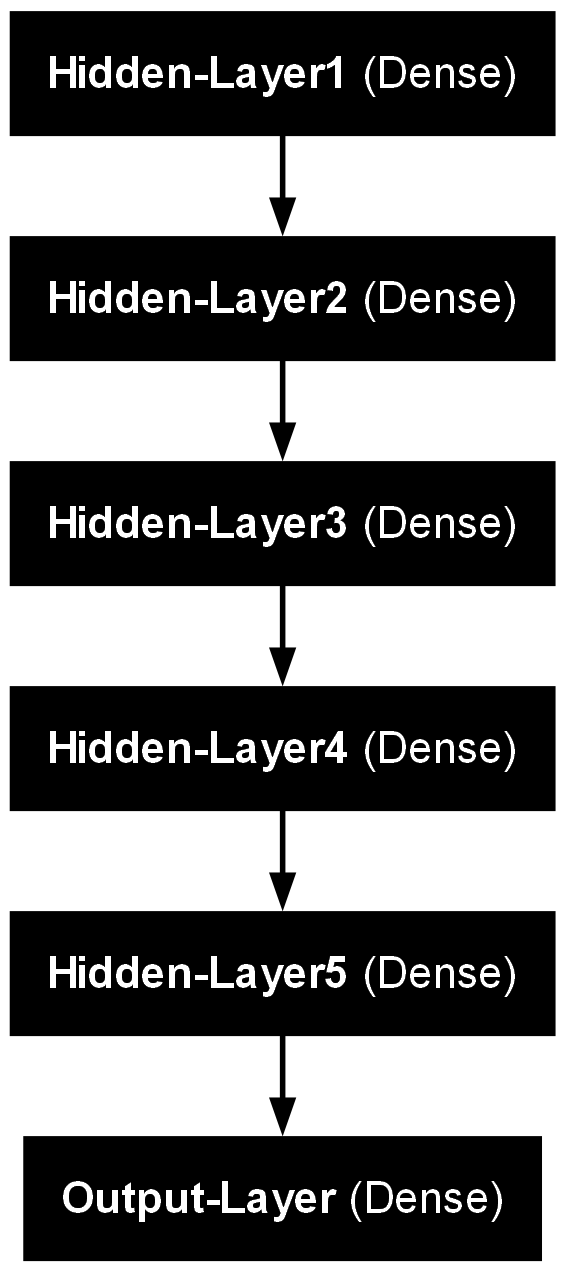

In [184]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=False, show_layer_names=True)

In [185]:
import matplotlib.pyplot as plt
from math import sqrt
def picture(loss,val_loss):
    if(loss=='root_mean_squared_error'):
        mse_loss='loss'
        val_mse_loss='val_loss'
        temp=[]
        # 計算RMSE均方根誤差
        for i in range(len(model_train.history[mse_loss])):
            temp.append(sqrt(model_train.history[mse_loss][i]))
        model_train.history[loss]=temp
        temp=[]
        for i in range(len(model_train.history[val_mse_loss])):
            temp.append(sqrt(model_train.history[val_mse_loss][i]))
        model_train.history[val_loss]=temp        
    # 提取訓練和驗證的損失值
    train_mse=model_train.history[loss]
    dev_mse=model_train.history[val_loss]
    # 對訓練過程的mse繪圖
    plt.figure(figsize =(8,5))
    plt.plot(range(1,len(model_train.history[loss])+1),train_mse,label='training '+ loss)
    plt.plot(range(1,len(model_train.history[val_loss])+1),dev_mse,label=val_loss)
    # plt.xticks(range(1,len(model_train.history[val_loss])+1))
    plt.ylabel(f"{loss}")
    plt.xlabel("epoch")
    plt.title("training predict")
    plt.grid(True)#有網格
    plt.legend()#顯示圖例
    plt.show()

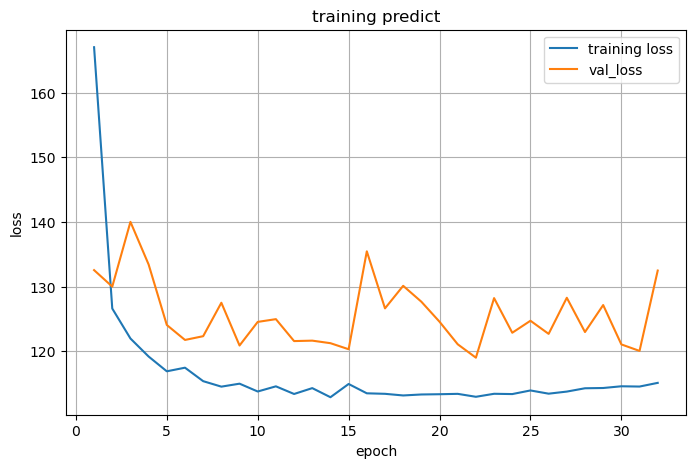

In [186]:
picture('loss','val_loss')

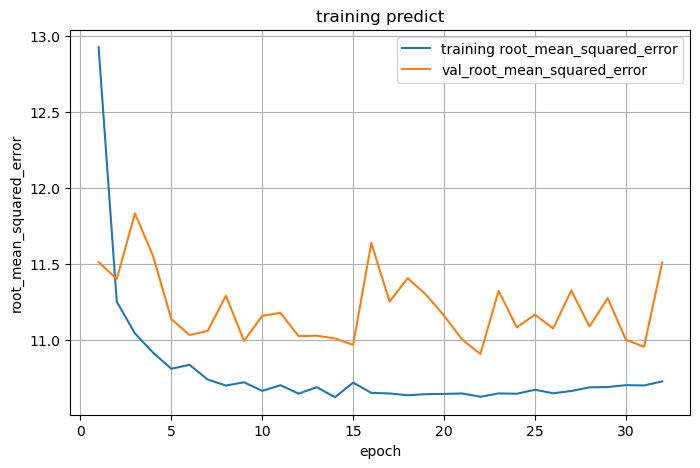

In [187]:
picture('root_mean_squared_error','val_root_mean_squared_error')

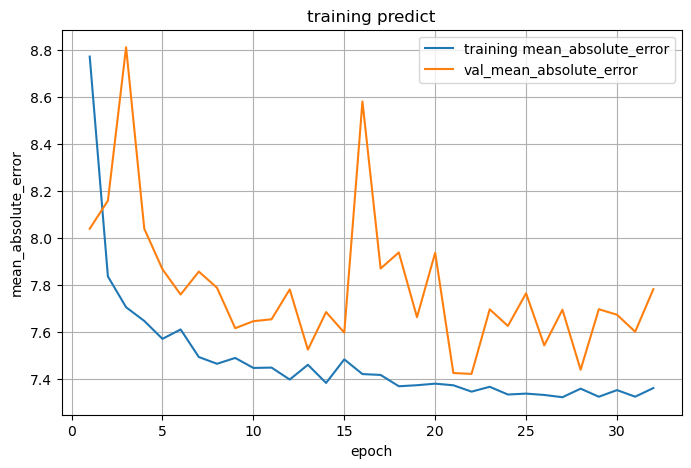

In [188]:
picture('mean_absolute_error','val_mean_absolute_error')

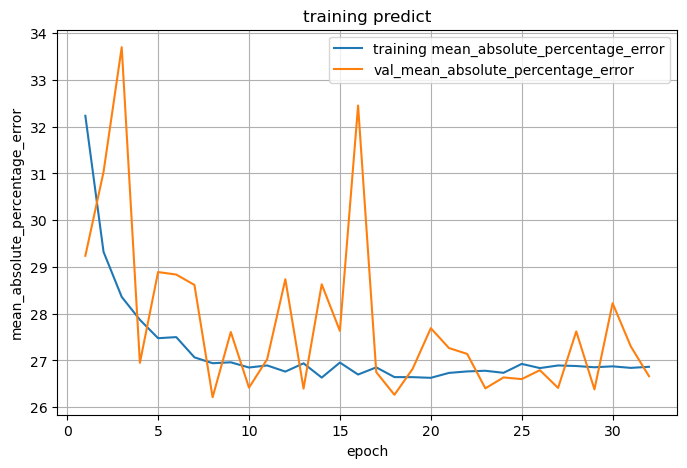

In [189]:
picture('mean_absolute_percentage_error','val_mean_absolute_percentage_error')

In [190]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
pred=model.predict(df_X)
#將索引按照1,2,3,4順序排列，避免有跳號出現
df_y.index=[np.arange(1,len(df_y)+1)]
print("列出前10筆資料")
table={'pred hours-per-week value':pred[:10].squeeze(), 'true hours-per-week value':df_y[:10]}
print(pd.DataFrame(table),'\n')

error_RMSE = sqrt(mean_squared_error(df_y,pred)) #calculate rmse
error_MAE = mean_absolute_error(df_y,pred)
error_MAPE = mean_absolute_percentage_error(df_y,pred)
print('RMSE value is:', error_RMSE)
print('MAE value is:', error_MAE)
print('MAPE value is:', error_MAPE)

results = []

942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step
列出前10筆資料
    pred hours-per-week value  true hours-per-week value
1                   39.434502                         40
2                   45.018723                         13
3                   40.081566                         40
4                   39.435463                         40
5                   31.288570                         40
6                   38.894943                         40
7                   36.964279                         16
8                   47.693684                         45
9                   41.161766                         50
10                  43.282349                         40 

RMSE value is: 11.031795763835836
MAE value is: 7.397653403209862
MAPE value is: 0.25472414224370316


測試資料

In [233]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [191]:
df_test=pd.read_csv("adult.test",names=["age","workclass","fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]) 

測試資料前處理

In [192]:
#刪除重複和問號的值
print("原始比數：",df_test.shape)
df_test.drop_duplicates(inplace=True)
print("刪除重複的值後：",df_test.shape)
df_test = df_test.replace(" ?", np.nan)
print("空的值有幾筆",df_test[pd.isnull(df_test).any(axis=1)].shape)
df_test.dropna(inplace=True)
print("刪除空值：",df_test.shape)

原始比數： (16282, 15)
刪除重複的值後： (16277, 15)
空的值有幾筆 (1222, 15)
刪除空值： (15055, 15)


In [193]:
df_y=df_test['hours-per-week']
df_X=df_test.drop(['hours-per-week'],axis=1)

normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','education-num']
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']
#y_columns=['hours-per-week']
#將類別資料轉成 labelencode
le = LabelEncoder()
for col in categorical_columns:
    df_X[col] = le.fit_transform(df_X[col])

def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df_X[columns] = scaler.fit_transform(df_X[columns])

normalize(normalize_columns)


print(df_X)

            age  workclass    fnlwgt  education  education-num  \
1     -1.029269          2  0.352055          1      -1.216355   
2     -0.057699          2 -0.945124         11      -0.434700   
3     -0.805061          1  1.395087          7       0.737782   
4      0.390718          2 -0.277454         15      -0.043872   
6     -0.356644          2  0.085883          0      -1.607182   
...         ...        ...       ...        ...            ...   
16276 -0.431380          2  0.526375          9       1.128610   
16277  0.017037          2  0.244266          9       1.128610   
16279 -0.057699          2  1.755223          9       1.128610   
16280  0.390718          2 -1.001210          9       1.128610   
16281 -0.281907          3 -0.070787          9       1.128610   

       marital-status  occupation  relationship  race  sex  capital-gain  \
1                   4           6             3     2    1     -0.145463   
2                   2           4             0     4  

測試資料處理後前幾筆

In [194]:
df_X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,salary
1,-1.029269,2,0.352055,1,-1.216355,4,6,3,2,1,-0.145463,-0.219208,37,0
2,-0.057699,2,-0.945124,11,-0.434700,2,4,0,4,1,-0.145463,-0.219208,37,0
3,-0.805061,1,1.395087,7,0.737782,2,10,0,4,1,-0.145463,-0.219208,37,1
4,0.390718,2,-0.277454,15,-0.043872,2,6,0,2,1,0.852437,-0.219208,37,1
6,-0.356644,2,0.085883,0,-1.607182,4,7,1,4,1,-0.145463,-0.219208,37,0


測試資料處理後幾筆

In [195]:
df_X.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,salary
16276,-0.431380,2,0.526375,9,1.12861,4,9,3,4,1,-0.145463,-0.219208,37,0
16277,0.017037,2,0.244266,9,1.12861,0,9,1,4,0,-0.145463,-0.219208,37,0
16279,-0.057699,2,1.755223,9,1.12861,2,9,0,4,1,-0.145463,-0.219208,37,0
16280,0.390718,2,-1.001210,9,1.12861,0,0,3,1,1,0.562594,-0.219208,37,0
16281,-0.281907,3,-0.070787,9,1.12861,2,3,0,4,1,-0.145463,-0.219208,37,1


評估績效


In [196]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
pred=model.predict(df_X)
#將索引按照1,2,3,4順序排列，避免有跳號出現
df_y.index=[np.arange(1,len(df_y)+1)]
print("列出前10筆資料")
table={'pred hours-per-week value':pred[:10].squeeze(), 'true hours-per-week value':df_y[:10]}
print(pd.DataFrame(table),'\n')

error_RMSE = sqrt(mean_squared_error(df_y,pred)) #calculate rmse
error_MAE = mean_absolute_error(df_y,pred)
error_MAPE = mean_absolute_percentage_error(df_y,pred)
print('RMSE value is:', error_RMSE)
print('MAE value is:', error_MAE)
print('MAPE value is:', error_MAPE)

results = []

  1/471 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step

471/471 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
列出前10筆資料
    pred hours-per-week value  true hours-per-week value
1                   35.554523                       40.0
2                   41.001060                       50.0
3                   42.242027                       40.0
4                   41.704056                       40.0
5                   38.895691                       30.0
6                   40.979263                       32.0
7                   29.396040                       40.0
8                   40.282135                       10.0
9                   40.243797                       40.0
10                  39.730495                       40.0 

RMSE value is: 11.190914016350451
MAE value is: 7.504775433396232
MAPE value is: 0.2639734649717036


比較最好的激活函數

In [197]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 定義要進行實驗的激活函數列表
activation_functions = ['relu', 'sigmoid', 'tanh']

# 儲存實驗結果的列表
results = []

# 遍歷不同的激活函數進行實驗
for activation in activation_functions:
    # 創建模型
    model = Sequential()
    model.add(Dense(128, input_dim=df_X.shape[1], activation=activation, name='Hidden-Layer1'))
    model.add(Dense(128, activation=activation, name='Hidden-Layer2'))
    model.add(Dense(128, activation=activation, name='Hidden-Layer3'))
    model.add(Dense(128, activation=activation, name='Hidden-Layer4'))
    model.add(Dense(128, activation=activation, name='Hidden-Layer5'))
    model.add(Dense(1, name='Output-Layer'))

    # 編譯模型
    model.compile(optimizer='adam', loss='mean_squared_error',
                  metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])

    # 切分訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

    # 模型訓練
    model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)

    # 模型預測
    y_pred = model.predict(X_test)

    # 計算評估指標
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # 將實驗結果添加到列表中
    results.append({
        'Activation Function': activation,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    })

# 將實驗結果轉換為DataFrame並顯示
results_df = pd.DataFrame(results)
print(results_df)

c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  Activation Function       RMSE       MAE      MAPE
0                relu  11.312093  7.730341  0.250105
1             sigmoid  10.756505  7.289593  0.254253
2                tanh  10.663094  7.184071  0.238316


找出最佳的層數和神經元數量

In [238]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dropout
def create_model(hidden_layers, hidden_units, activation, optimizer, learning_rate=None):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dropout(0.2))
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation=activation))
        model.add(Dropout(0.2))
    model.add(Dense(1)) 
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                      metrics=['mean_absolute_error', 'mean_absolute_percentage_error','root_mean_squared_error'])
    return model


def train_model(model, epochs, batch_size, early_stop=None):
    callbacks = []
    if early_stop:
        callbacks.append(EarlyStopping(patience=early_stop))
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2, callbacks=callbacks)
    return history


In [260]:
# Define parameters for experiments
experiments = [
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 2, 'hidden_units': 1000, 'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.01},
    {'hidden_layers': 3, 'hidden_units': 1000, 'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.1}
]

histories = []
batch = [64, 128, 256]
patient = [20, 20, 20]
for bsize, exp, patient in zip(batch, experiments, patient):
    model = create_model(exp['hidden_layers'], exp['hidden_units'], exp['activation'], exp['optimizer'], exp['learning_rate'])
    history = train_model(model, epochs=100, batch_size=bsize, early_stop = patient)
    histories.append(history)

Epoch 1/100


151/151 - 1s - 10ms/step - loss: 238.6154 - mean_absolute_error: 10.4148 - mean_absolute_percentage_error: 36.9250 - root_mean_squared_error: 15.4550 - val_loss: 138.3170 - val_mean_absolute_error: 7.6580 - val_mean_absolute_percentage_error: 32.9088 - val_root_mean_squared_error: 11.7706
Epoch 2/100
151/151 - 0s - 2ms/step - loss: 136.5384 - mean_absolute_error: 7.6323 - mean_absolute_percentage_error: 31.2287 - root_mean_squared_error: 11.6891 - val_loss: 129.7008 - val_mean_absolute_error: 7.7039 - val_mean_absolute_percentage_error: 31.9370 - val_root_mean_squared_error: 11.3991
Epoch 3/100
151/151 - 0s - 2ms/step - loss: 131.3027 - mean_absolute_error: 7.7143 - mean_absolute_percentage_error: 31.0352 - root_mean_squared_error: 11.4599 - val_loss: 127.2164 - val_mean_absolute_error: 7.7848 - val_mean_absolute_percentage_error: 32.0993 - val_root_mean_squared_error: 11.2899
Epoch 4/100
151/151 - 0s - 2ms/step - loss: 129.0909 - mean_absolute_error: 7.7172 - mean_absolute_percentage_

In [261]:
history.history.keys()


dict_keys(['loss', 'mean_absolute_error', 'mean_absolute_percentage_error', 'root_mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error', 'val_root_mean_squared_error'])

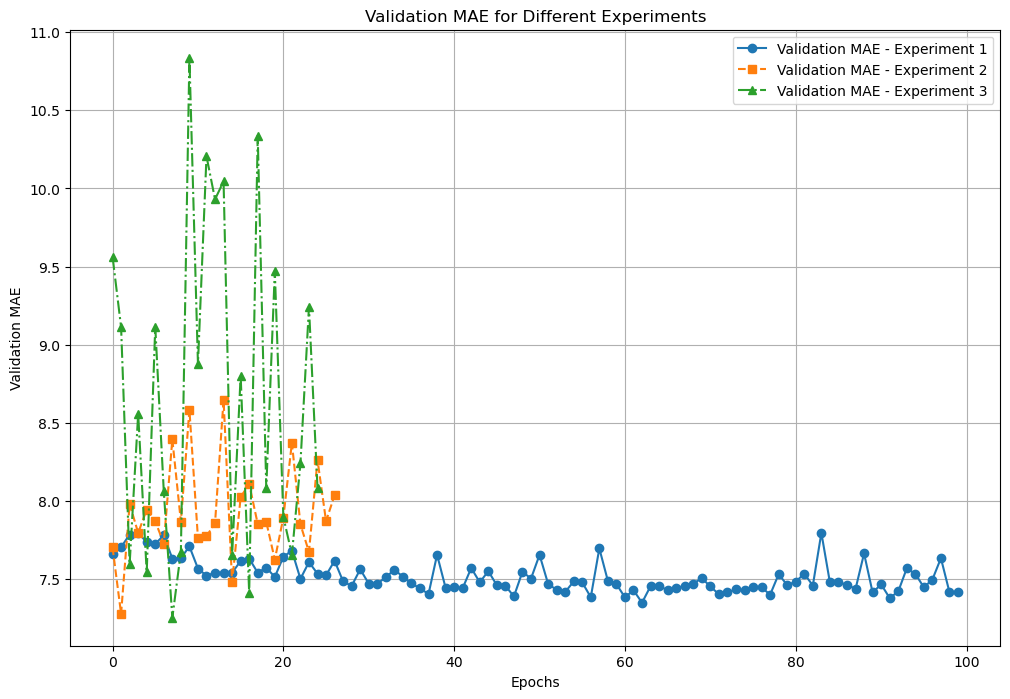

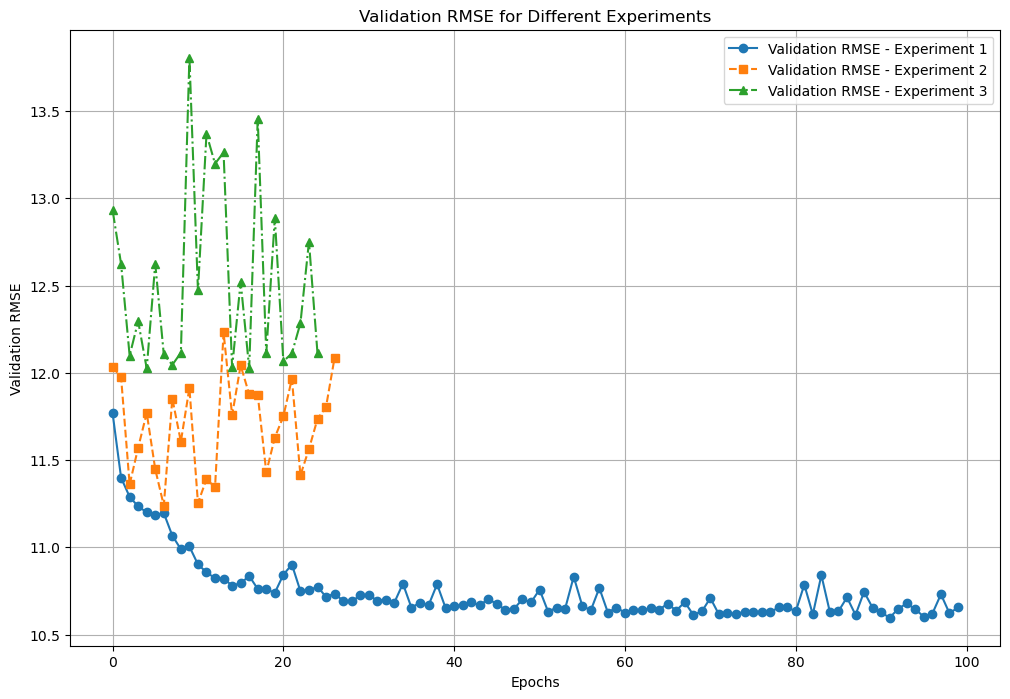

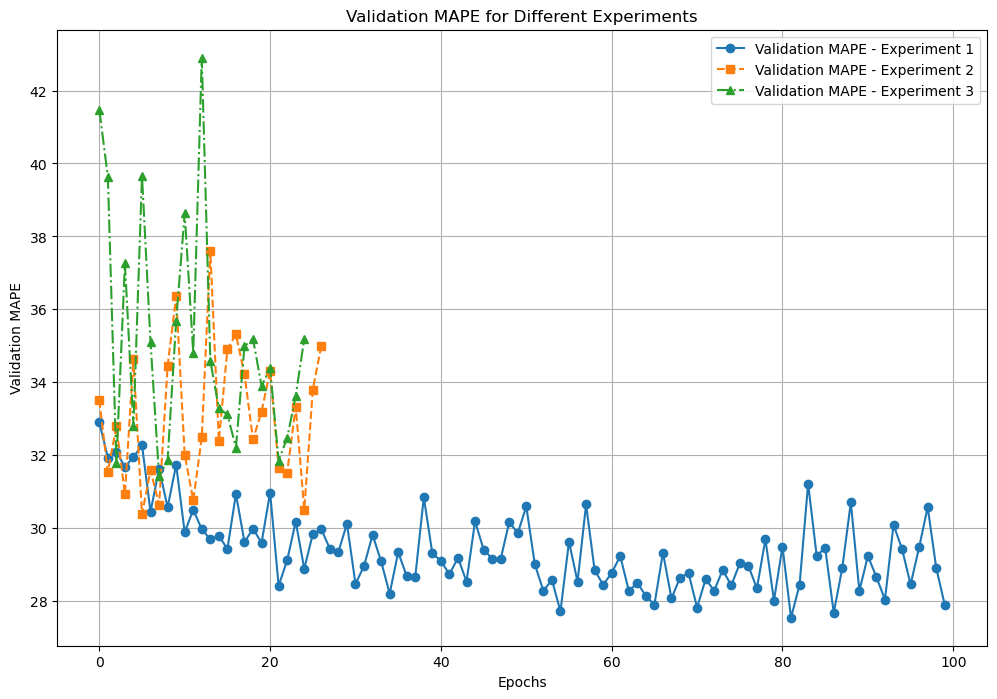

In [262]:
plt.figure(figsize=(12, 8))

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']

for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_accuracy = history_df['val_mean_absolute_error'].min()
    plt.plot(history_df['val_mean_absolute_error'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation MAE - Experiment {i+1}')
plt.title('Validation MAE for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_accuracy = history_df['val_root_mean_squared_error'].min()
    plt.plot(history_df['val_root_mean_squared_error'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation RMSE - Experiment {i+1}')
plt.title('Validation RMSE for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Validation RMSE')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_accuracy = history_df['val_mean_absolute_percentage_error'].min()
    plt.plot(history_df['val_mean_absolute_percentage_error'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation MAPE - Experiment {i+1}')
plt.title('Validation MAPE for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Validation MAPE')
plt.legend()
plt.grid(True)
plt.show()

---------------------

In [263]:
# 定義要進行實驗的層數和神經元數量列表
layer_sizes = [1, 2, 3]  # 隱藏層的層數
neuron_counts = [128, 256, 512]  # 每層的神經元數量

# 儲存最佳模型的結果
best_result = {
    'Hidden Layer Sizes': None,
    'RMSE': np.inf,
    'MAE': np.inf,
    'MAPE': np.inf,
    'Best Layer Count': None  # 新增的鍵
}

# 遍歷不同的層數和神經元數量進行實驗
for layer_size in layer_sizes:
    for neuron_count in neuron_counts:
        # 創建模型
        model = Sequential()
        for i in range(layer_size):
            if i == 0:
                model.add(Dense(neuron_count, input_dim=df_X.shape[1], activation='tanh', name=f'Hidden-Layer{i+1}'))
            else:
                model.add(Dense(neuron_count, activation='tanh', name=f'Hidden-Layer{i+1}'))
        model.add(Dense(1, name='Output-Layer'))

        # 編譯模型
        model.compile(optimizer='adam', loss='mean_squared_error',
                      metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])

        # 切分訓練集和測試集
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

        # 模型訓練
        model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)

        # 模型預測
        y_pred = model.predict(X_test)

        # 計算評估指標
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        # 更新最佳結果
        if rmse < best_result['RMSE']:
            best_result['RMSE'] = rmse
            best_result['MAE'] = mae
            best_result['MAPE'] = mape
            best_result['Hidden Layer Sizes'] = (neuron_count,) * layer_size
            best_result['Best Layer Count'] = layer_size  # 更新最佳模型的層數

# 將最佳結果輸出
print("最佳模型的結果:")
print(best_result)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
最佳模型的結果:
{'Hidden Layer Sizes': (256,), 'RMSE': 10.64960927700467, 'MAE': 7.32831502982209, 'MAPE': 0.25062886003155094, 'Best Layer Count': 1}


針對所有的績效指標可以看出層數和神經元顆數關係的折線圖

In [264]:
import matplotlib.pyplot as plt

# 儲存每個組合的指標數值
rmse_values = []
mae_values = []
mape_values = []

# 遍歷不同的層數和神經元數量進行實驗
for layer_size in layer_sizes:
    for neuron_count in neuron_counts:
        # 創建模型
        model = Sequential()
        for i in range(layer_size):
            if i == 0:
                model.add(Dense(neuron_count, input_dim=df_X.shape[1], activation='tanh', name=f'Hidden-Layer{i+1}'))
            else:
                model.add(Dense(neuron_count, activation='tanh', name=f'Hidden-Layer{i+1}'))
        model.add(Dense(1, name='Output-Layer'))

        # 編譯模型
        model.compile(optimizer='adam', loss='mean_squared_error',
                      metrics=['mean_absolute_error', 'mean_absolute_percentage_error','root_mean_squared_error'])

        # 切分訓練集和測試集
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

        # 模型訓練
        model_train = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2)

        # 模型預測
        y_pred = model.predict(X_test)

        # # 計算評估指標
        # rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        # mae = mean_absolute_error(y_test, y_pred)
        # mape = mean_absolute_percentage_error(y_test, y_pred)

        # # 儲存指標數值
        # rmse_values.append(rmse)
        # mae_values.append(mae)
        # mape_values.append(mape)

# # 將指標數值轉換成矩陣，以便繪製折線圖
# rmse_matrix = np.array(rmse_values).reshape(len(layer_sizes), len(neuron_counts))
# mae_matrix = np.array(mae_values).reshape(len(layer_sizes), len(neuron_counts))
# mape_matrix = np.array(mape_values).reshape(len(layer_sizes), len(neuron_counts))

# # 繪製RMSE折線圖
# plt.figure(figsize=(10, 6))
# for i, layer_size in enumerate(layer_sizes):
#     plt.plot(layer_size, rmse_matrix[i], marker='o', label=f'{neuron_counts[i]} neuron', linestyle='-' if i % 2 == 0 else '--')
# plt.xlabel('Number of Neurons')
# plt.ylabel('RMSE')
# plt.title('RMSE vs. Number of Neurons for Different Layer Sizes')
# plt.legend()
# plt.grid(True)
# plt.show()

# # 繪製MAE折線圖
# plt.figure(figsize=(10, 6))
# for i, layer_size in enumerate(layer_sizes):
#     plt.plot(neuron_counts, mae_matrix[i], marker='o', label=f'{layer_size} Layers', linestyle='-' if i % 2 == 0 else '--')
# plt.xlabel('Number of Neurons')
# plt.ylabel('MAE')
# plt.title('MAE vs. Number of Neurons for Different Layer Sizes')
# plt.legend()
# plt.grid(True)
# plt.show()

# # 繪製MAPE折線圖
# plt.figure(figsize=(10, 6))
# for i, layer_size in enumerate(layer_sizes):
#     plt.plot(neuron_counts, mape_matrix[i], marker='o', label=f'{layer_size} Layers', linestyle='-' if i % 2 == 0 else '--')
# plt.xlabel('Number of Neurons')
# plt.ylabel('MAPE')
# plt.title('MAPE vs. Number of Neurons for Different Layer Sizes')
# plt.legend()
# plt.grid(True)
# plt.show()


Epoch 1/100


c:\Users\SimYu\anaconda3\envs\SimYu\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


189/189 - 2s - 9ms/step - loss: 812.4081 - mean_absolute_error: 25.3285 - mean_absolute_percentage_error: 61.8301 - root_mean_squared_error: 28.5346
Epoch 2/100
189/189 - 0s - 1ms/step - loss: 218.4983 - mean_absolute_error: 11.6298 - mean_absolute_percentage_error: 36.0651 - root_mean_squared_error: 14.7966
Epoch 3/100
189/189 - 0s - 1ms/step - loss: 149.5099 - mean_absolute_error: 7.7392 - mean_absolute_percentage_error: 30.8326 - root_mean_squared_error: 12.2333
Epoch 4/100
189/189 - 0s - 1ms/step - loss: 144.3829 - mean_absolute_error: 7.3551 - mean_absolute_percentage_error: 30.9840 - root_mean_squared_error: 12.0243
Epoch 5/100
189/189 - 0s - 1ms/step - loss: 141.2793 - mean_absolute_error: 7.3479 - mean_absolute_percentage_error: 30.9423 - root_mean_squared_error: 11.8972
Epoch 6/100
189/189 - 0s - 990us/step - loss: 138.8363 - mean_absolute_error: 7.3777 - mean_absolute_percentage_error: 31.0512 - root_mean_squared_error: 11.7762
Epoch 7/100
189/189 - 0s - 999us/step - loss: 13

In [ ]:
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_loss = history_df['val_loss'].min()
    best_loss_epoch = history_df['val_loss'].idxmin() + 1
    # print(f"第{i+1}組參數: 在第 {best_loss_epoch} EPOCH\nBEST LOSS: {best_loss}")
    results_loss.append({'參數組合': f'第{i+1}組參數', 'BEST LOSS': best_loss, 'BEST LOSS EPOCH': best_loss_epoch})
    plt.plot(history_df['val_loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Loss - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
# results_df_loss = pd.DataFrame(results_loss)
# print(results_df_loss)
plt.title('Validation Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()

[13.236297607421875,
 12.0630464553833,
 12.069928169250488,
 12.07971477508545,
 12.070721626281738,
 12.06602668762207,
 12.077723503112793,
 12.003565788269043,
 11.558329582214355,
 11.369406700134277,
 11.2538423538208,
 11.117528915405273,
 11.030741691589355,
 10.927762985229492,
 10.872958183288574,
 10.801094055175781,
 10.771510124206543,
 10.782814979553223,
 10.780292510986328,
 10.74814510345459,
 10.728461265563965,
 10.755697250366211,
 10.707625389099121,
 10.724817276000977,
 10.711908340454102,
 10.692846298217773,
 10.688817977905273,
 10.674227714538574,
 10.674055099487305,
 10.630606651306152,
 10.6079740524292,
 10.639453887939453,
 10.627596855163574,
 10.650208473205566,
 10.597057342529297,
 10.568273544311523,
 10.567728042602539,
 10.577192306518555,
 10.562837600708008,
 10.532567024230957,
 10.552885055541992,
 10.542947769165039,
 10.563888549804688,
 10.5283842086792,
 10.498766899108887,
 10.495594024658203,
 10.490213394165039,
 10.485496520996094,
 10

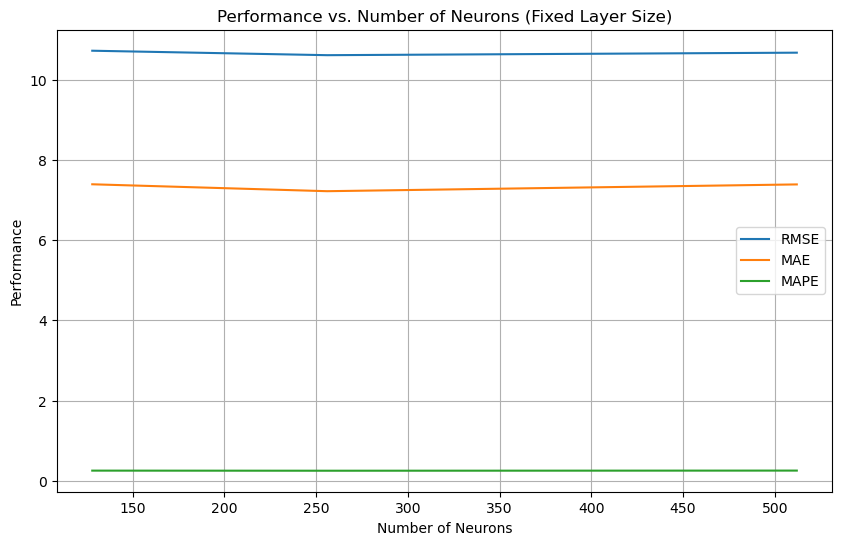

In [ ]:

# 繪製折線圖
plt.figure(figsize=(10, 6))
plt.plot(neuron_counts, performance['RMSE'], label='RMSE')
plt.plot(neuron_counts, performance['MAE'], label='MAE')
plt.plot(neuron_counts, performance['MAPE'], label='MAPE')
plt.xlabel('Number of Neurons')
plt.ylabel('Performance')
plt.title('Performance vs. Number of Neurons (Fixed Layer Size)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# # 定義要進行實驗的隱藏層組合和神經元數量
# hidden_layer_sizes = [(128,), (256,), (512,), (128, 128), (256, 256), (512, 512)]

# # 儲存最佳模型的結果
# best_result = {
#     'Activation Function': None,
#     'Hidden Layer Sizes': None,
#     'RMSE': np.inf,
#     'MAE': np.inf,
#     'MAPE': np.inf
# }

# # 遍歷不同的隱藏層組合和神經元數量進行實驗
# for hidden_layer_size in hidden_layer_sizes:
#     # 創建模型
#     model = Sequential()
#     for i, neurons in enumerate(hidden_layer_size):
#         if i == 0:
#             model.add(Dense(neurons, input_dim=df_X.shape[1], activation='tanh', name=f'Hidden-Layer{i+1}'))
#         else:
#             model.add(Dense(neurons, activation='tanh', name=f'Hidden-Layer{i+1}'))
#     model.add(Dense(1, name='Output-Layer'))

#     # 編譯模型
#     model.compile(optimizer='adam', loss='mean_squared_error',
#                   metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])

#     # 切分訓練集和測試集
#     X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

#     # 模型訓練
#     model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)

#     # 模型預測
#     y_pred = model.predict(X_test)

#     # 計算評估指標
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     mae = mean_absolute_error(y_test, y_pred)
#     mape = mean_absolute_percentage_error(y_test, y_pred)

#     # 更新最佳結果
#     if rmse < best_result['RMSE']:
#         best_result['RMSE'] = rmse
#         best_result['MAE'] = mae
#         best_result['MAPE'] = mape
#         best_result['Hidden Layer Sizes'] = hidden_layer_size

# # 將最佳結果輸出
# print("最佳模型的結果:")
# print(best_result)